In [292]:
import pandas as pd
from tqdm import tqdm
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [174]:
df = pd.read_json('weather.json',lines=True)

In [333]:
%%time
columns='start'
while len(columns)>0:
    columns = {c:[k for k in df[c][0].keys()] for c in df.columns if type(df[c][0]) is dict}
    for c in columns:
        for k in columns[c]:
            df[f'{c}_{k}'] = df[c].str[f'{k}']
    df.drop(columns = columns,inplace=True)


CPU times: user 41.7 ms, sys: 15.5 ms, total: 57.2 ms
Wall time: 55.7 ms


In [184]:
df['time'] = pd.to_datetime(df['time'],unit='s')

By running .describe() function we can tell we are looking at weather data across world during time-period described below: 
- start 2019-04-05 11:05:04
- end   2019-04-05 11:08:26

In [188]:
df['time'].describe()

count                  209579
unique                    203
top       2019-04-05 11:05:28
freq                     1758
first     2019-04-05 11:05:04
last      2019-04-05 11:08:26
Name: time, dtype: object

#Temparature

All temperatures seems to be in Kelvin format. We will convert them to Celsius isntead.

In [204]:
for c in [c for c in df.columns if 'temp' in c]:
    df[c] = df[c] - 273.15

In [209]:
plot_df = df.groupby(['city_name']).mean()

In [261]:
df['lon'] = df['city_coord_lon'].round()
df['lat'] = df['city_coord_lat'].round()

In [269]:
df.groupby(['lon','lat']).mean().reset_index()

lon   lat    city_id  city_zoom  main_temp  main_pressure  \
0    -180.0 -17.0  4036017.0       16.0     26.829        1012.67   
1    -179.0 -18.0  4036024.0       16.0     27.279        1012.99   
2    -179.0  66.0  4031742.0       16.0    -17.221        1017.47   
3    -179.0  69.0  4031681.0       16.0    -17.721        1015.87   
4    -178.0 -14.0  4034778.0       16.0     28.879        1011.95   
...     ...   ...        ...        ...        ...            ...   
9608  179.0 -17.0  2201079.0       16.0     27.329        1012.71   
9609  179.0 -16.0  2203790.5       11.5     27.879        1012.55   
9610  179.0  -9.0  4307217.8       13.8     29.379        1010.99   
9611  179.0  63.0  2129284.5       16.0    -13.071        1016.03   
9612  180.0 -16.0  2199295.0       16.0     27.329        1012.71   

      main_humidity  main_temp_min  main_temp_max  wind_speed  wind_deg  \
0              99.0         26.829         26.829        2.12     108.5   
1             100.0         27.279         27.279        2.77     101.5   
2              58.0        -17.221        -17.221        0.87     311.0   
3              64.0        -17.721        -17.721        2.37     305.0   
4             100.0         28.879         28.879        3.57     114.0   
...             ...            ...            ...         ...       ...   
9608           88.0         27.329         27.329        1.92      93.5   
9609           97.0         27.879         27.879        2.87      94.5   
9610          100.0         29.379         29.379        3.12      66.0   
9611           87.0        -13.071        -13.071        3.87     330.5   
9612           88.0         27.329         27.329        1.92      93.5   

      clouds_all  city_coord_lon  city_coord_lat  
0           12.0     -179.866669      -16.700001  
1           92.0     -178.800003      -18.183331  
2            8.0     -179.166672       66.316673  
3            0.0     -179.183334       68.833328  
4           24.0     -178.166672      -14.300000  
...          ...             ...             ...  
9608        68.0      179.333328      -16.799999  
9609        48.0      179.366669      -16.450000  
9610        80.0      179.173444       -8.519390  
9611         0.0      179.291664       63.058334  
9612        68.0      179.500000      -16.500000  

[9613 rows x 14 columns]

To improve graph performance, we need to reduce points that are being plotted. 

By rounding latitude and longtitude values I will reduce 209579 data points into 9613. 

That is 21x less data while still preserving enough details and faster plotting times.

In [293]:
my_scaler = MinMaxScaler(feature_range=(0,100))

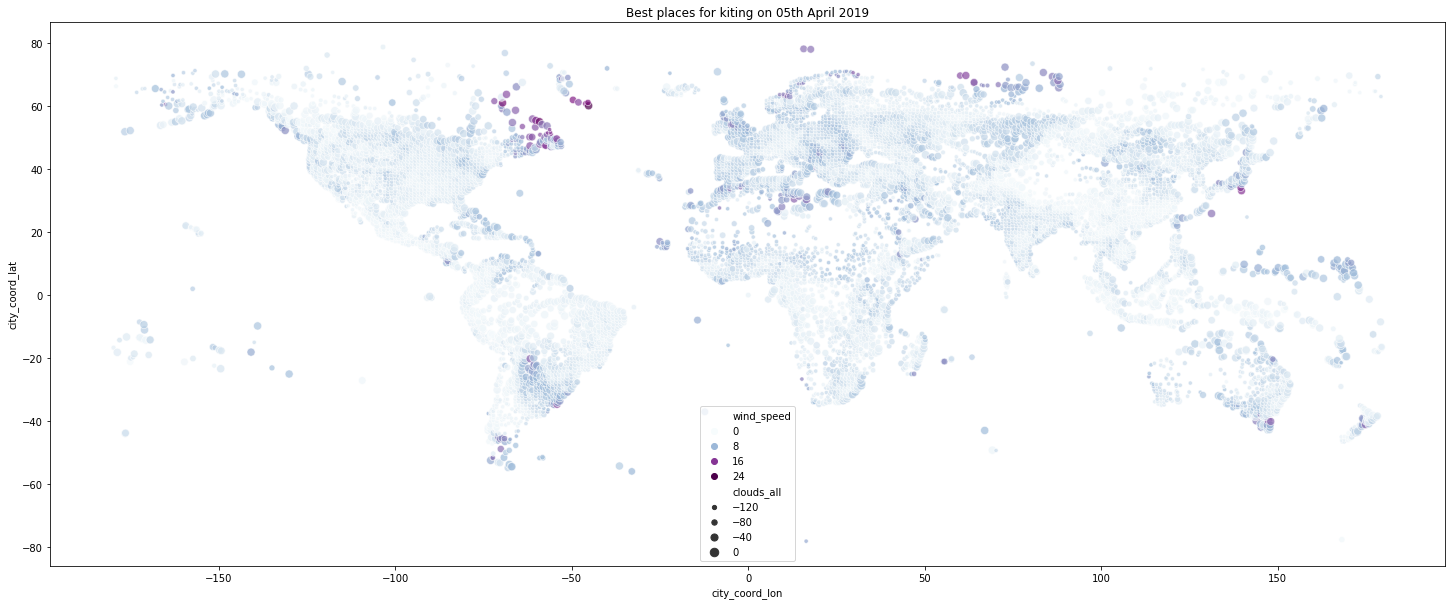

In [331]:
#Best places on world for kiting 2019-04-05 
plt.figure(figsize=[25,10])
plt.title('Best places for kiting on 05th April 2019')
sns.scatterplot(data=plot_df,
                x='city_coord_lon',
                y='city_coord_lat',
                hue='wind_speed',
                alpha=0.7,
                palette='BuPu',
                size=plot_df['clouds_all'] - 100,
                )

plt.show()